In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_report(path):
    return np.fromfile(path, sep = ' ').reshape((-1,7))

mjd_unixtimestamp_offset = 10587.5
seconds_in_day = 3600 * 24

def mjd2unixtimestamp(m):
    return (m - mjd_unixtimestamp_offset) * seconds_in_day

In [3]:
pre = load_report('orbit/tcm2/Tianwen1_preTCM.txt')
post = load_report('orbit/tcm2/Tianwen1_postTCM.txt')[::-1]
t = np.datetime64('1970-01-01') + (mjd2unixtimestamp(pre[:,0]) * 1e9) * np.timedelta64(1, 'ns')

In [4]:
post_interp = np.empty_like(post)
post_interp[:,0] = pre[:,0]
for j in range(1, post_interp.shape[1]):
    post_interp[:,j] = np.interp(post_interp[:,0], post[:,0], post[:,j], left = np.nan, right = np.nan)

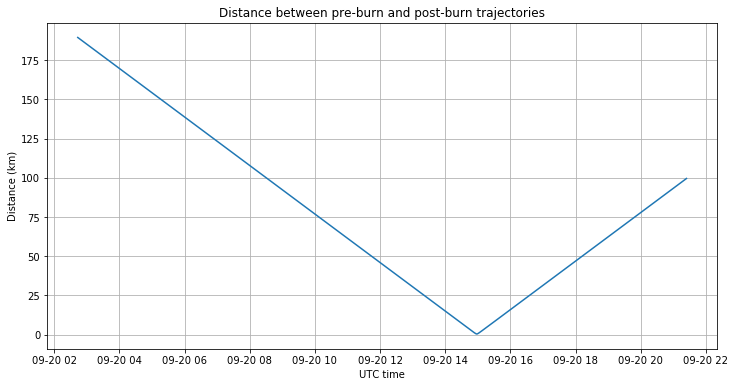

In [5]:
plt.figure(figsize = (12,6), facecolor = 'w')
dist = np.sqrt(np.sum((pre[:,1:4] - post_interp[:,1:4])**2, axis = 1))
plt.plot(t, dist)
plt.grid()
plt.title('Distance between pre-burn and post-burn trajectories')
plt.xlabel('UTC time')
plt.ylabel('Distance (km)');

In [6]:
burn_idx = np.argmin(dist[~np.isnan(dist)])
t[burn_idx]

numpy.datetime64('2020-09-20T14:58:09.781000192')

In [7]:
dist[burn_idx]

0.44922672322308194

In [8]:
delta_v_ms = (post_interp[burn_idx, 4:] - pre[burn_idx, 4:]) * 1e3
delta_v_ms

array([-0.2795918 ,  0.68354296,  4.23141581])

In [9]:
delta_v_norm = np.sqrt(np.sum(delta_v_ms**2))
delta_v_norm

4.295379177531651

In [15]:
z_angle = np.rad2deg(np.arccos(delta_v_ms[2]/delta_v_norm))
z_angle

9.900176971433057

In [10]:
# Burn of 4x 120N for 20 seconds quoted in http://global.chinadaily.com.cn/a/202009/21/WS5f683e9ea31024ad0ba7acab.html
F = 4*120
T = 20
m = 5000
delta_v_press_release = F/m*T
delta_v_press_release

1.92

In [11]:
tcm1_ullage = 0.14692372536714965 * 14.848102803753614
tcm1_ullage

2.181538578561901

In [12]:
delta_v_press_release + tcm1_ullage

4.1015385785619